AlexNet

In [1]:
import torch.nn as nn
import torchvision
from torchvision import models
import matplotlib.pyplot as plt

Class Counter: 4
Class Names: ['DEER', 'FOX', 'SQUIRREL', 'WOLF']
Device: cuda


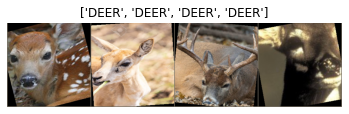

In [2]:
from ipynb.fs.full.main import train_model, test_model, CLASS_COUNTER, device, optim, lr_scheduler, visualize_model, losses, accuracy_Scores, f1_Scores, precision_Scores, recall_Scores

In [3]:
LEARNING_RATE = 0.001
NUM_EPOCHS = 100

In [4]:
alexnet = models.alexnet(pretrained=True)
num_ftrs = alexnet.classifier[6].in_features
alexnet.classifier[6] = nn.Linear(num_ftrs, CLASS_COUNTER)

alexnet = alexnet.to(device)
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer = optim.SGD(alexnet.parameters(), lr=LEARNING_RATE)

step_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Epoch 0/99
----------
[TRAIN] Loss: 0.5423 Acc: 0.7932 F1-Score: 0.1967 Precision: 0.2216 Recall: 0.1993
[VALID] Loss: 0.3222 Acc: 0.8750 F1-Score: 0.2163 Precision: 0.2338 Recall: 0.2188

Epoch 1/99
----------
[TRAIN] Loss: 0.3431 Acc: 0.8817 F1-Score: 0.2208 Precision: 0.2375 Recall: 0.2214
[VALID] Loss: 0.2016 Acc: 0.9214 F1-Score: 0.2293 Precision: 0.2405 Recall: 0.2303

Epoch 2/99
----------
[TRAIN] Loss: 0.3017 Acc: 0.8947 F1-Score: 0.2231 Precision: 0.2382 Recall: 0.2246
[VALID] Loss: 0.1964 Acc: 0.9227 F1-Score: 0.2302 Precision: 0.2413 Recall: 0.2307

Epoch 3/99
----------
[TRAIN] Loss: 0.2512 Acc: 0.9090 F1-Score: 0.2275 Precision: 0.2413 Recall: 0.2282
[VALID] Loss: 0.3491 Acc: 0.8802 F1-Score: 0.2155 Precision: 0.2324 Recall: 0.2200

Epoch 4/99
----------
[TRAIN] Loss: 0.2093 Acc: 0.9155 F1-Score: 0.2292 Precision: 0.2408 Recall: 0.2298
[VALID] Loss: 0.2152 Acc: 0.9201 F1-Score: 0.2291 Precision: 0.2406 Recall: 0.2300

Epoch 5/99
----------
[TRAIN] Loss: 0.2072 Acc: 0.9350 

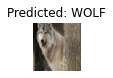

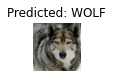

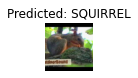

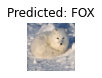

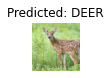

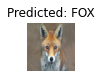

In [5]:
base_model = train_model(alexnet,"alexnet", criterion, optimizer, step_lr_scheduler, num_epochs=NUM_EPOCHS)
visualize_model(base_model)
plt.show()

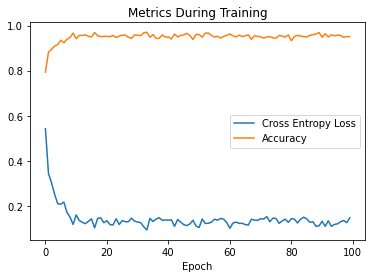

In [6]:
plt.plot(losses, label = "Cross Entropy Loss")
plt.plot(accuracy_Scores, label = "Accuracy")
plt.xlabel('Epoch')
plt.legend()
plt.title('Metrics During Training');

In [ ]:
base_model = test_model(base_model, criterion)